# Laser pulse propagation in optical fiber

This notebook shows a simple, scalar implementation of the Fourier Pseudo Spectral Method <a href="#1">[1]</a> for solving the Nonlinear Schrödinger Equation <a href="#2">[2]</a>.

$\frac{\partial A}{\partial z}=-\frac{\alpha}{2}A+i \frac{\beta_2}{2} \frac{\partial^2 A}{\partial t^2}-i \gamma(|A|^2A)$

This nonlinear partial differential equation models how the envelope and phase of light pulse changes when propagating through a single mode optical fiber, when taking power attenuation ($\alpha$), group velocity dispersion ($\beta_2$)and waveguide nonlinearity ($\gamma$) causing self-phase modulation (SPM) into account. A is the slowly varying amplitude of the pulse envelope and t is measured in a frame of reference moving with the pulse at the group velocity $v_g$. The nonlinear Schrödinger equation (for optics) can be derived from the wave equation. However we can choose between two (Fourier transform) notations. The derivation with the negative one can be found in Ursula Keller's book <a href="#3">[3]</a>. I used this, because the scipy library uses the negative convention for the DFT. The plotting functions originally came from here <a href="#4">[4]</a>.

## References

<div id="1">[1] Wikimedia Foundation. (2024, November 28). Pseudo-spectral method. Wikipedia. https://en.wikipedia.org/wiki/Pseudo-spectral_method</div>
<div id="2">[2] Wikimedia Foundation. (2024, November 21). Nonlinear Schrödinger equation. Wikipedia. https://en.wikipedia.org/wiki/Nonlinear_Schr%C3%B6dinger_equation</div>
<div id="3">[3] Keller, U. (2023). Ultrafast lasers: A comprehensive introduction to fundamental principles with practical applications. Springer International Publishing.</div>
<div id="4">[4] Krarup, O. (n.d.). OLEKRARUP123/NLSE-vector-solver: Code for modelling the nonlinear Schrödinger equation for optical fiber pulse propagation. GitHub. https://github.com/OleKrarup123/NLSE-vector-solver</div>

## Importing the modules

In [1]:
from libraries import *
from variables import *
from functions import *
from classes import *

c:\Users\Balazs\Desktop\kutatás\fractional nonlinear Schrödinger equation\simulation_v1.16\classes.py:20: RuntimeWarning: divide by zero encountered in divide
  wavelength = speed_of_light / f


## Initialize class about simulation parameters

In [2]:
sim_config = SIM_config(N,Time_window,frequency0,wavelength0)

## Testing the defined functions

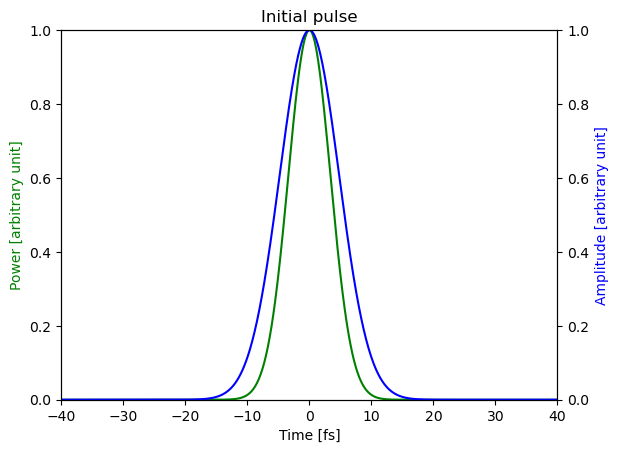

In [3]:
# Initialize Gaussian pulse in the time domain
testPulse = GaussianPulseTime(sim_config.t,amplitude,duration)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
plt.title("Initial pulse")
ax1.plot(sim_config.t,getPower(testPulse)/np.max(getPower(testPulse)),'g-')
ax2.plot(sim_config.t,abs(testPulse)/np.max(abs(testPulse)),'b-')
ax1.set_xlabel("Time [fs]")
ax1.set_ylabel("Power [arbitrary unit]", color='g')
ax2.set_ylabel("Amplitude [arbitrary unit]", color='b')
ax1.set_ylim(0,1)
ax2.set_ylim(0,1)
plt.xlim(-5*duration,5*duration)
savePlot('initial pulse')
plt.show()

## Testing the defined spectrum functions

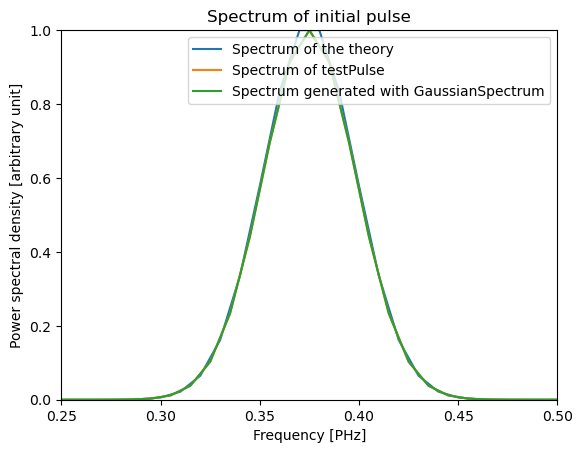

In [4]:
# Initialize Gaussian pulse in the frequency domain
testSpectrumTheory = GaussianPulseFrequency(sim_config.f,sim_config.frequency0,amplitude,duration)
# Getting spectrum from pulse
testSpectrum=getSpectrumFromPulse(sim_config.t,sim_config.f,testPulse)
# Getting Gaussian spectrum
testSpectrum_2=GaussianSpectrum(sim_config.t,sim_config.f,amplitude,1/(duration))
plt.figure()
plt.title("Spectrum of initial pulse")
plt.plot(sim_config.f,getPower(testSpectrumTheory)/np.max(getPower(testSpectrumTheory)),label="Spectrum of the theory")
plt.plot(sim_config.f_rel,getPower(testSpectrum)/np.max(getPower(testSpectrum)),label="Spectrum of testPulse")
plt.plot(sim_config.f_rel,getPower(testSpectrum_2)/np.max(getPower(testSpectrum_2)),label="Spectrum generated with GaussianSpectrum")
plt.axis([-1/duration + sim_config.frequency0,1/duration + sim_config.frequency0,0,1])
plt.xlabel("Frequency [PHz]")
plt.ylabel("Power spectral density [arbitrary unit]")
plt.legend()
savePlot('spectrum of the initial pulse')
plt.show()

## Testing the FWHM function

In [5]:
FWHM_frequency=FWHM(sim_config.f,getPower(testSpectrum))
FWHM_time=FWHM(sim_config.t,getPower(testPulse))
product=FWHM_frequency*FWHM_time
print(f"The product of the pulse and the spectrum's FWHM is {product}")

The product of the pulse and the spectrum's FWHM is 0.40078201368524513


## Initialize class about fiber

In [6]:
fiber=Fiber_config(nsteps,Length,gammaconstant,beta2,alpha_dB_per_km)

# Run Simulation

In [7]:
pulseMatrix, spectrumMatrix = FPSM(fiber,sim_config,testPulse)
testPulse0=np.copy(pulseMatrix[0,:])
testSpectrum0=np.copy(spectrumMatrix[0,:])
testPulseFinal=np.copy(pulseMatrix[-1,:])
testSpectrumFinal=np.copy(spectrumMatrix[-1,:])

1 % ready
2 % ready
3 % ready
4 % ready
5 % ready
6 % ready
7 % ready
8 % ready
9 % ready
10 % ready
11 % ready
12 % ready
13 % ready
14 % ready
15 % ready
16 % ready
17 % ready
18 % ready
19 % ready
20 % ready
21 % ready
22 % ready
23 % ready
24 % ready
25 % ready
26 % ready
27 % ready
28 % ready
29 % ready
30 % ready
31 % ready
32 % ready
33 % ready
34 % ready
35 % ready
36 % ready
37 % ready
38 % ready
39 % ready
40 % ready
41 % ready
42 % ready
43 % ready
44 % ready
45 % ready
46 % ready
47 % ready
48 % ready
49 % ready
50 % ready
51 % ready
52 % ready
53 % ready
54 % ready
55 % ready
56 % ready
57 % ready
58 % ready
59 % ready
60 % ready
61 % ready
62 % ready
63 % ready
64 % ready
65 % ready
66 % ready
67 % ready
68 % ready
69 % ready
70 % ready
71 % ready
72 % ready
73 % ready
74 % ready
75 % ready
76 % ready
77 % ready
78 % ready
79 % ready
80 % ready
81 % ready
82 % ready
83 % ready
84 % ready
85 % ready
86 % ready
87 % ready
88 % ready
89 % ready
90 % ready
91 % ready
92 % rea

## Initialize functions for plotting the results

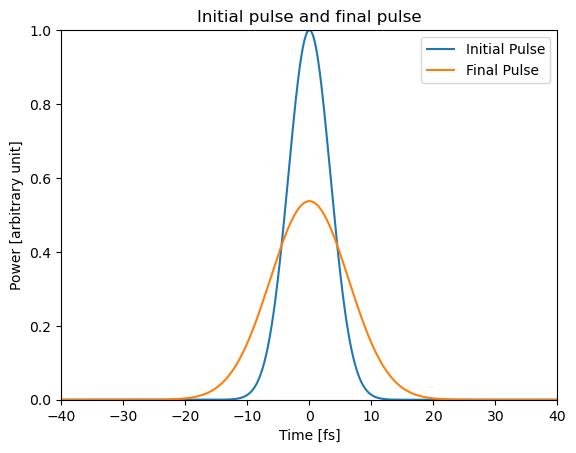

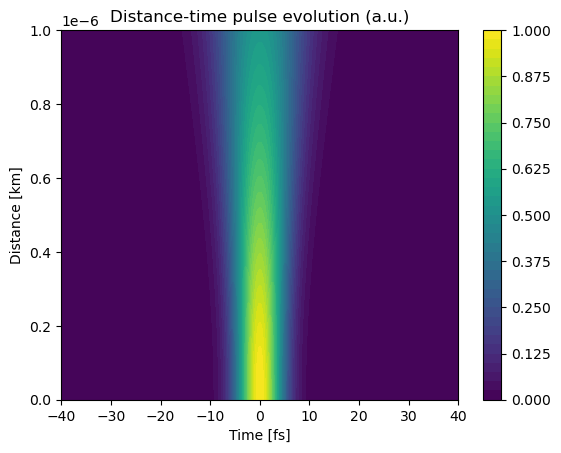

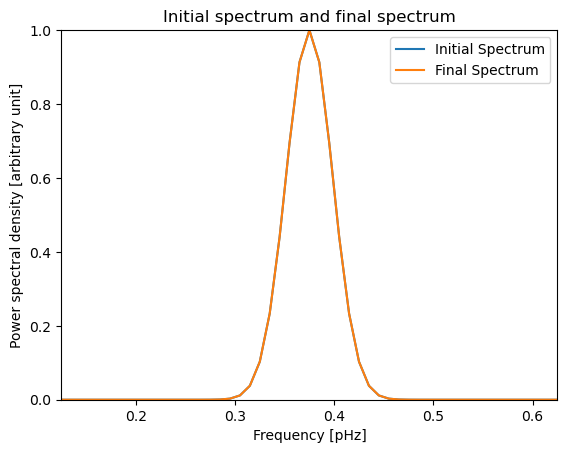

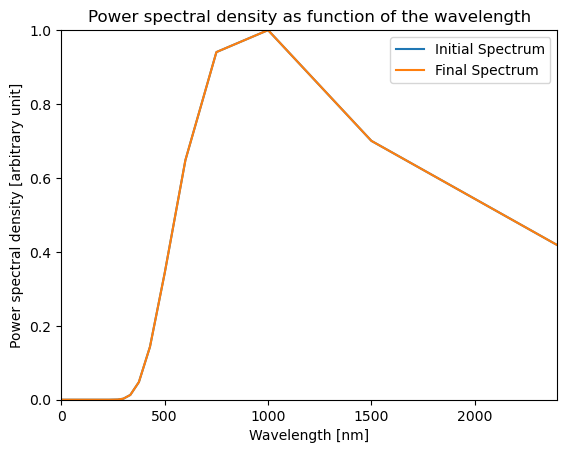

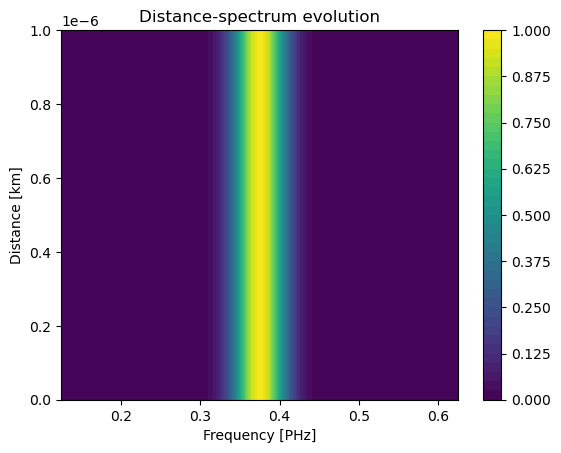

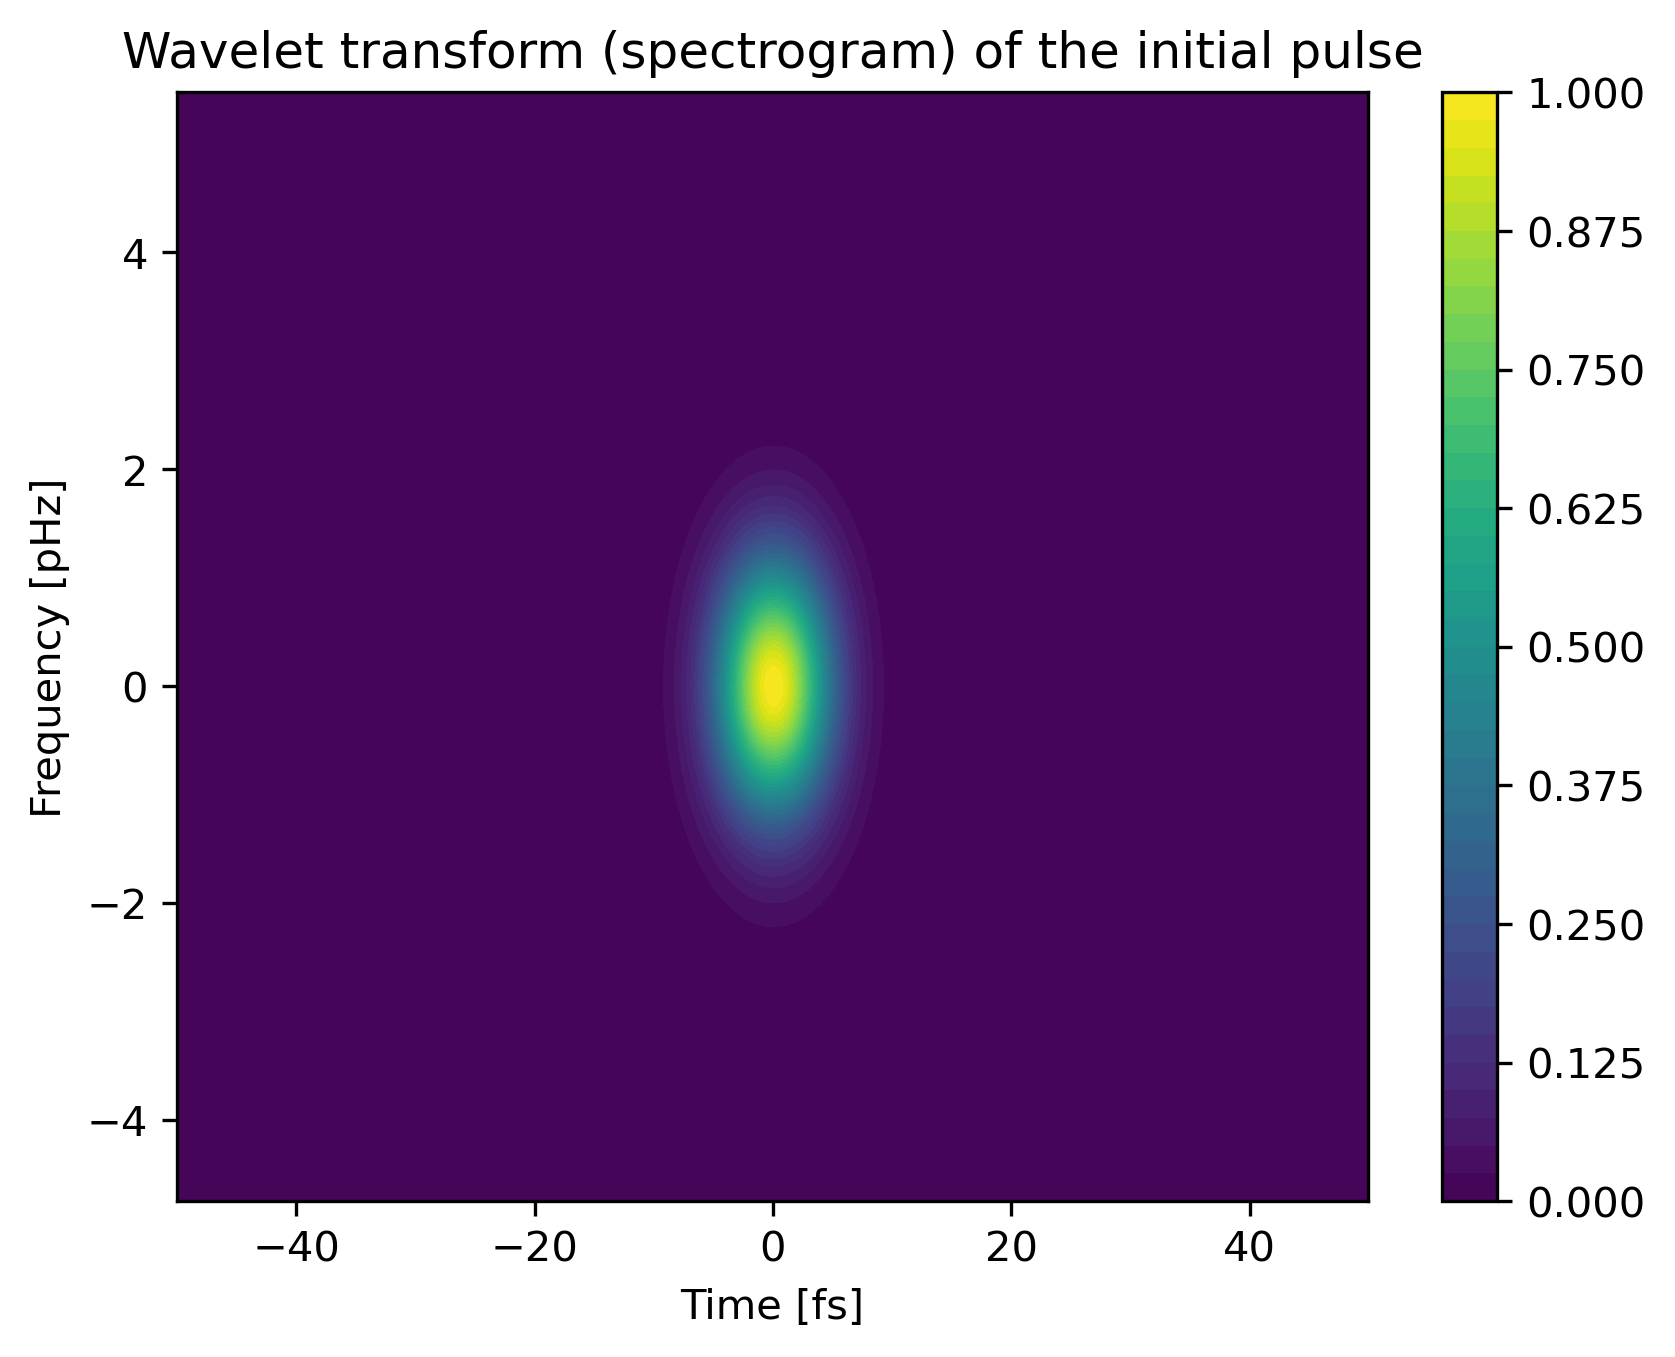

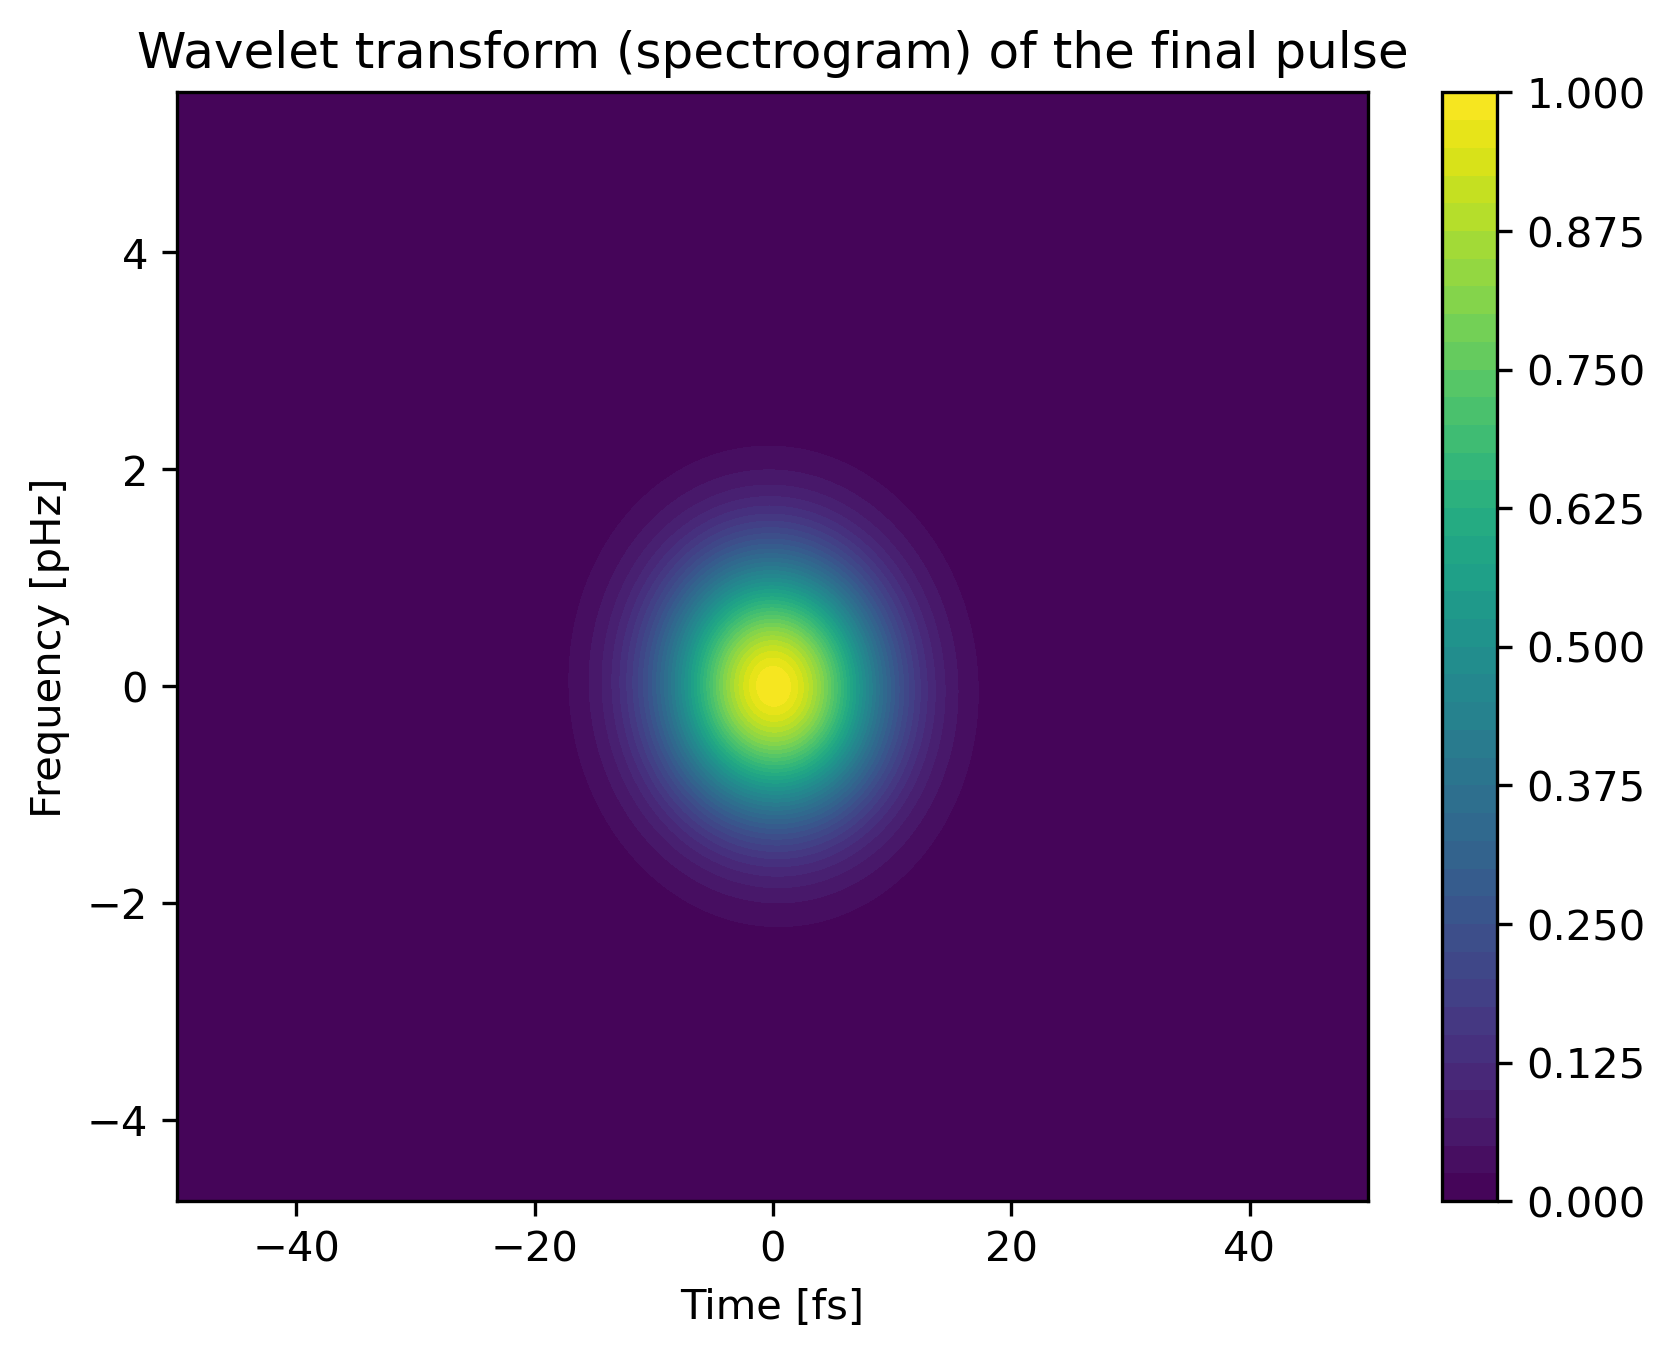

In [8]:
#%%script false
FWHM_frequency_final=FWHM(sim_config.f_rel,getPower(testSpectrumFinal))
plotFirstAndLastPulse(pulseMatrix,sim_config)
plotPulseMatrix2D(pulseMatrix,fiber,sim_config)
plotFirstAndLastSpectrum(spectrumMatrix,sim_config,FWHM_frequency_final)
plotPSDwavelength(spectrumMatrix,sim_config)
plotSpectrumMatrix2D(spectrumMatrix,fiber,sim_config,FWHM_frequency_final)
plotSpectrogram(sim_config, pulseMatrix[0,:], 2000, 2000, label='initial')
plotSpectrogram(sim_config, pulseMatrix[-1,:], 2000, 2000, label='final')